Esse mini-projeto tem como objetivo para classificar carteiras de crédito dos bancos brasileiros usando dados do Banco Central.

Aqui vamos explorar os dados do mês de junho/2022.

Começamos com os imports:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

Depois de analizar um pouco o arquivos, descobrimos como importá-lo:

In [51]:
estban = pd.read_csv("202206_ESTBAN.CSV"
                  , sep=';'
                  , skiprows=[0,1]
                  , encoding="latin1"
                  )

estban.head()

,#DATA_BASE,UF,CODMUN,MUNICIPIO,CNPJ,NOME_INSTITUICAO,AGEN_ESPERADAS,AGEN_PROCESSADAS,VERBETE_110_ENCAIXE,VERBETE_111_CAIXA,...,VERBETE_481_IOF + VERBETE_482_CONTRIBUICOES_PREVIDENCIARIAS + VERBETE_483_TRIBUTOS_ESTAD_E_MUNICIPAIS + VERBETE_484_TRIBUTOS_FEDERAIS + VERBETE_485_FGTS + VERBETE_487_DEMAIS_RECEBIMENTOS,VERBETE_486_PIS/PASEP,VERBETE_490_CHEQUES_ADMINISTRATIVOS + VERBETE_500_OUTRAS_OBRIGACOES,VERBETE_610_PATRIMONIO_LIQUIDO,VERBETE_710_CONTAS_DE_RESULTADO,VERBETE_711_CONTAS_CREDORAS,VERBETE_712_CONTAS_DEVEDORAS,VERBETE_800_CONTAS_DE_COMPENSACAO,VERBETE_899_TOTAL_DO_PASSIVO,CODMUN_IBGE
0,202206,AC,5184,MANOEL URBANO,360305,CAIXA ECONOMICA FEDERAL,1,1,1030661.0,1030661.0,...,25506.0,0.0,36562.0,0.0,1142461.0,1931929.0,-789467.0,50005862.0,63928877.0,1200344.0
1,202206,AC,9465,ASSIS BRASIL,360305,CAIXA ECONOMICA FEDERAL,1,1,1054181.0,1054181.0,...,2712.0,0.0,12417.0,0.0,604009.0,1019371.0,-415362.0,49039232.0,55088997.0,1200054.0
2,202206,AC,15978,FEIJO,360305,CAIXA ECONOMICA FEDERAL,1,1,2807722.0,2807722.0,...,19907.0,0.0,295183.0,0.0,2390130.0,3408460.0,-1018330.0,78995901.0,98109883.0,1200302.0
3,202206,AC,15978,FEIJO,4902979,BCO DA AMAZONIA S.A.,1,1,225617.0,225617.0,...,553.0,0.0,37436.0,0.0,501451.0,809913.0,-308462.0,71906968.0,83492716.0,1200302.0
4,202206,AC,18690,XAPURI,4902979,BCO DA AMAZONIA S.A.,1,1,292732.0,292732.0,...,5424.0,0.0,82135.0,0.0,1023025.0,1287317.0,-264292.0,80337120.0,105840490.0,1200708.0


Estamos interassados apenas nos dados de crédito
Lendo os metadados no site do Banco Central, esses são os verbetes 160-179.

In [52]:
credito = estban.filter(regex = r"NOME_INSTITUICAO|(VERBETE_1(6|7))", axis = 1)

Esse arquivo possui os dados por município.
Queremos os dados nacionais por banco.

In [53]:
credito_nacional = credito.groupby(by=["NOME_INSTITUICAO"]).sum()
credito_nacional.head()

,VERBETE_160_OPERACOES_DE_CREDITO,VERBETE_161_EMPRES_E_TIT_DESCONTADOS,VERBETE_162_FINANCIAMENTOS,VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST,VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST,VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ,VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ,VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS,VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS,VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO,VERBETE_172_OUTROS_CREDITOS,VERBETE_173_CREDITOS_EM_LIQUIDACAO,VERBETE_174_PROV_P/_OPER_CREDITOS,VERBETE_176_OPERACOES_ESPECIAIS
NOME_INSTITUICAO,,,,,,,,,,,,,,
BANCO BARI S.A.,7.734152e+08,6.962544e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2.911276e+07,0.0,6.999021e+07,0.0,-2.194219e+07,0.0
BANCO BRADESCARD,1.160680e+10,3.344005e+09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.809436e+09,-336908840.0,-1.209737e+09,0.0
BANCO BTG PACTUAL S.A.,6.976233e+10,3.356101e+10,3.497663e+09,4.317693e+09,0.0,0.0,0.0,0.0,4.432317e+09,0.0,2.538216e+10,0.0,-1.428507e+09,0.0
BANCO CIFRA,1.462117e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.462117e+08,0.0,0.000000e+00,0.0
BANCO FINAXIS,9.830110e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.830110e+06,0.0,0.000000e+00,0.0


Os nomes dos verbetes são muito longos, vamos usar só os dígitos.
Mas vamos salvar os nomes originais para ficar mais fácil de compreender depois.

In [54]:
verbetes = credito_nacional.columns

verbetes

Index(['VERBETE_160_OPERACOES_DE_CREDITO',
       'VERBETE_161_EMPRES_E_TIT_DESCONTADOS', 'VERBETE_162_FINANCIAMENTOS',
       'VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST',
       'VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST',
       'VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ',
       'VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ',
       'VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS',
       'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS',
       'VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO',
       'VERBETE_172_OUTROS_CREDITOS', 'VERBETE_173_CREDITOS_EM_LIQUIDACAO',
       'VERBETE_174_PROV_P/_OPER_CREDITOS', 'VERBETE_176_OPERACOES_ESPECIAIS'],
      dtype='object')

In [55]:
def get_num(col):
  match = re.search(r"1(6|7)\d", col)
  return match.group(0)

credito_nacional = credito_nacional.rename(columns=get_num)

credito_nacional.head()

,160,161,162,163,164,165,166,167,169,171,172,173,174,176
NOME_INSTITUICAO,,,,,,,,,,,,,,
BANCO BARI S.A.,7.734152e+08,6.962544e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2.911276e+07,0.0,6.999021e+07,0.0,-2.194219e+07,0.0
BANCO BRADESCARD,1.160680e+10,3.344005e+09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.809436e+09,-336908840.0,-1.209737e+09,0.0
BANCO BTG PACTUAL S.A.,6.976233e+10,3.356101e+10,3.497663e+09,4.317693e+09,0.0,0.0,0.0,0.0,4.432317e+09,0.0,2.538216e+10,0.0,-1.428507e+09,0.0
BANCO CIFRA,1.462117e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.462117e+08,0.0,0.000000e+00,0.0
BANCO FINAXIS,9.830110e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.830110e+06,0.0,0.000000e+00,0.0


Os metadados dão a entender que o verbete 160 é a soma dos demais, mas não explicita isso. Vale a pena verificar:

In [56]:
credito_nao_160 = credito_nacional.filter(regex = r"1(6[1-9]|7)", axis = 1)

somas = credito_nao_160.sum(axis=1)

check = abs(somas - credito_nacional["160"])

check.max()

47.0

Verificamos que o valor máximo de `check` é 47 reais, claramente um pequeno erro de ponto flutuante dado a ordem de grandeza dos nossos dados.

Vamos manter os dados ordenados por volume total para ser mais fácil de interpretar:

In [57]:
credito_nacional = credito_nacional.sort_values(by = "160")

print(credito_nacional.to_string())

                                                 160           161           162           163  164  165  166           167           169           171           172           173           174  176
NOME_INSTITUICAO                                                                                                                                                                                      
BCO WESTERN UNION                       2.258030e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.000000e+00  0.000000e+00  0.000000e+00  2.258030e+05  0.000000e+00  0.000000e+00  0.0
SOCIAL BANK S/A                         3.717150e+06  2.067052e+06  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.000000e+00  0.000000e+00  0.000000e+00  1.764385e+06  0.000000e+00 -1.142870e+05  0.0
BANCO FINAXIS                           9.830110e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.000000e+00  0.000000e+00  0.000000e+00  9.830110e+06  0.000000e+00  0.000000e+00  0.0
BCO C

Vemos que o volume de crédito varia de 200 mil a quase 1 trilhão de reais.

Mas queremos classificar as carteiras de crédito, ou seja, as proporções nos diferentes verbetes.

In [58]:
carteiras = credito_nacional.filter(regex = r"1(6[1-9]|7)", axis = 1).div(credito_nacional["160"], axis=0)

carteiras.head()

,161,162,163,164,165,166,167,169,171,172,173,174,176
NOME_INSTITUICAO,,,,,,,,,,,,,
BCO WESTERN UNION,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
SOCIAL BANK S/A,0.556085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474661,0.0,-0.030746,0.0
BANCO FINAXIS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
BCO CEDULA S.A.,0.129850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.870994,0.0,-0.000844,0.0
BCO B3 S.A.,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0


O plano agora é agrupar os bancos por carteiras semelhantes.
Para isso vamos usar o kmeans.
É difícil decidir quantos grupos queremos. Uma primeira euristica é o "método dos cotovelos".

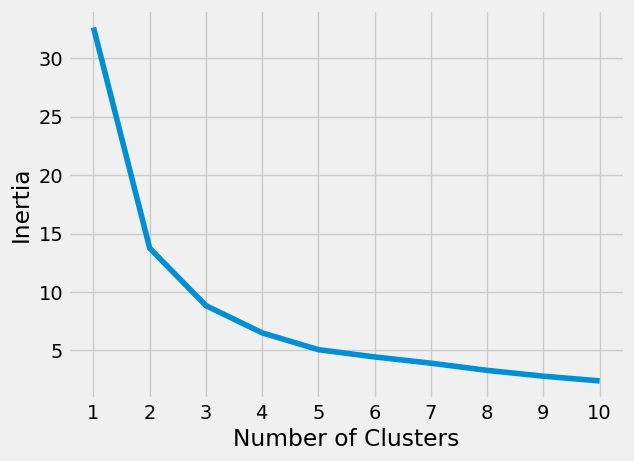

In [59]:
inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(carteiras)
  inertias.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), inertias)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Olhando para o gráfico, o número de clusters deveria ser 3.
Vamos ver o que isso nos dá.
Escolhemos uma seed para a aleatoriade para o resultado ser reproduzível.

In [60]:
seed = 131

kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(carteiras)

centers_3 = pd.DataFrame(kmeans.cluster_centers_.round(1), columns= carteiras.columns)
centers_3

,161,162,163,164,165,166,167,169,171,172,173,174,176
0,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.3,-0.0,-0.0,0.0
1,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.9,-0.0,-0.0,0.0
2,0.8,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.2,-0.0,-0.0,0.0


O que significa cada coluna mesmo?

In [61]:
verbetes

Index(['VERBETE_160_OPERACOES_DE_CREDITO',
       'VERBETE_161_EMPRES_E_TIT_DESCONTADOS', 'VERBETE_162_FINANCIAMENTOS',
       'VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST',
       'VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST',
       'VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ',
       'VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ',
       'VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS',
       'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS',
       'VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO',
       'VERBETE_172_OUTROS_CREDITOS', 'VERBETE_173_CREDITOS_EM_LIQUIDACAO',
       'VERBETE_174_PROV_P/_OPER_CREDITOS', 'VERBETE_176_OPERACOES_ESPECIAIS'],
      dtype='object')

Esses clusteres não parecem com o esperado. 
Créditos imobiliários não apareceram e os créditos para agro apareceram com peso muito pequeno. 
Talvez realmente poucos bancos trabalham nessas áreas, mas será o caso?

In [62]:
carteiras.max()

161    1.014750
162    0.918849
163    0.714878
164    0.000000
165    0.000000
166    0.000000
167    0.294184
169    0.702397
171    0.113250
172    1.010739
173    0.000000
174    0.000000
176    0.000000
dtype: float64

Muitas colunas são nulas mesmo, mas financiamentos imobiliários e agro de fato são relevantes para alguns bancos. Talvez sejam poucos, e por isso 3 grupos não são capazes de classificálos.

Vamos olhar para os créditos imobiliários

In [63]:
print(carteiras.sort_values(by = "169").round(2).to_string())

                                         161   162   163  164  165  166   167   169   171   172   173   174  176
NOME_INSTITUICAO                                                                                                
BCO WESTERN UNION                       0.00  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  1.00  0.00  0.00  0.0
DEUTSCHE BANK S.A.BCO ALEMAO            0.13  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.89  0.00 -0.02  0.0
BCO AGIBANK S.A.                        0.99  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.01  0.04  0.00 -0.05  0.0
BCO MIZUHO S.A.                         0.13  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.02  0.85  0.00 -0.00  0.0
PARANA BCO S.A.                         0.99  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.02  0.00 -0.02  0.0
BCO BV S.A.                             0.35  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.77 -0.01 -0.11  0.0
BCO FIBRA S.A.                          0.31  0.17  0.03  0.0  0.0  0.0  0.00  0.00  0.00  0.51 

Certamente a Caixa é um outlier. E temos ainda alguns outros poucos bancos que também investem em crédito imobiliário.

Agora vamos para o agro:

In [64]:
print(carteiras.sort_values(by = "163").round(2).to_string())

                                         161   162   163  164  165  166   167   169   171   172   173   174  176
NOME_INSTITUICAO                                                                                                
BCO WESTERN UNION                       0.00  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  1.00  0.00  0.00  0.0
BCO BV S.A.                             0.35  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.77 -0.01 -0.11  0.0
BCO PINE S.A.                           0.55  0.11  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.39  0.00 -0.05  0.0
BCO CARGILL S.A.                        0.00  0.17  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.83  0.00 -0.00  0.0
BCO INDUSTRIAL DO BRASIL S.A.           0.47  0.12  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.42  0.00 -0.01  0.0
BCO SUMITOMO MITSUI BRASIL S.A.         0.44  0.05  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.52  0.00 -0.00  0.0
BCO DIGIMAIS S.A.                       0.06  0.92  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.15 

O Banco John Deere também é um outlier. E também temos alguns bancos que investem em agro.

O método do cotovelo é apenas uma heurística, que não deu resultados bons no nosso caso. Vamos remover os dois outliers e procurar mais grupos.

In [65]:
carteiras_bulk = carteiras.drop(["CAIXA ECONOMICA FEDERAL","BANCO JOHN DEERE S.A."])

O plano agora é rodar o KMeans tentando encontrar mais grupos. Os resultados com 5 e 7 grupos indicam algo interessante.

In [66]:
kmeans_5 = KMeans(n_clusters=5, random_state=seed)
kmeans_5.fit(carteiras_bulk)

centers_5 = pd.DataFrame(kmeans_5.cluster_centers_.round(1), columns= carteiras.columns)
centers_5

,161,162,163,164,165,166,167,169,171,172,173,174,176
0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,-0.0,-0.0,0.0
1,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.9,-0.0,-0.0,0.0
2,0.8,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.1,-0.0,-0.0,0.0
3,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,-0.0,-0.1,0.0
4,0.3,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.0,0.2,-0.0,-0.0,0.0


Aqui os grupos 1 e 2 são os os grupos 1 e 2 que tínhamos quando procuramos só 3 grupos. Mas os outros 3 grupos são mais informativos do que o antigo grupo 0. Rodando o o KMeans de forma aleatória (i.e., sem o seed) várias vezes vemos que o resultado é consistente (a menos da ordem dos grupos, claro).

In [67]:
kmeans_temp = KMeans(n_clusters=5)
kmeans_temp.fit(carteiras_bulk)

centers_temp = pd.DataFrame(kmeans_temp.cluster_centers_.round(1), columns= carteiras.columns)
centers_temp

,161,162,163,164,165,166,167,169,171,172,173,174,176
0,0.8,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.1,-0.0,-0.0,0.0
1,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.9,-0.0,-0.0,0.0
2,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,-0.0,-0.1,0.0
3,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,-0.0,-0.0,0.0
4,0.3,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.0,0.2,-0.0,-0.0,0.0


Agora vamos para 7 grupos:

In [68]:
kmeans_7 = KMeans(n_clusters=7, random_state=seed)
kmeans_7.fit(carteiras)

centers_7 = pd.DataFrame(kmeans_7.cluster_centers_.round(1), columns= carteiras.columns)
centers_7

,161,162,163,164,165,166,167,169,171,172,173,174,176
0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,-0.0,-0.0,0.0
1,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,-0.0,-0.0,0.0
2,0.2,0.1,0.4,0.0,0.0,0.0,0.0,0.2,0.0,0.2,-0.0,-0.0,0.0
3,0.2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,-0.1,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0
5,0.6,0.1,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.2,-0.0,-0.0,0.0
6,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,-0.0,-0.0,0.0


O que vemos é que os grupos 0, 1 e 2 do ``kmeans_5`` se dividiram. Aqueles grupos eram concentrados apenas nas variáveis 161 e 172. E ganhamos mais 2 grupos com essa cara, que não parecem tão diferentes assim.

O que acontece com essas variáveis?

In [69]:
temp = carteiras_bulk[carteiras_bulk["161"] + carteiras_bulk["172"] >= 0.8]

len(temp)

89

Temos que 89 dos nossos 119 bancos se concentram apenas nessas duas variáveis!

In [70]:
print(temp[["161", "172"]].sort_values(by = "161").round(1).to_string())

                                        161  172
NOME_INSTITUICAO                                
BCO WESTERN UNION                       0.0  1.0
BCO CARGILL S.A.                        0.0  0.8
BCO BRADESCO BERJ S.A.                  0.0  1.0
BCO BBI S.A.                            0.0  1.0
BCO ABN AMRO S.A.                       0.0  1.0
ITAÚ UNIBANCO HOLDING S.A.              0.0  1.0
ING BANK N.V.                           0.0  1.0
STATE STREET BR S.A. BCO COMERCIAL      0.0  1.0
BCO ITAÚ BBA S.A.                       0.0  1.0
CITIBANK N.A.                           0.0  1.0
BCO BANDEPE S.A.                        0.0  1.0
BCV - BCO, CRÉDITO E VAREJO S.A.        0.0  1.0
JPMORGAN CHASE BANK                     0.0  1.0
BCO CLASSICO S.A.                       0.0  1.0
BCO MORGAN STANLEY S.A.                 0.0  1.0
BANCO CIFRA                             0.0  1.0
BANCO FINAXIS                           0.0  1.0
BCO B3 S.A.                             0.0  1.0
BCO ITAUBANK S.A.   

Como podemos ver, temos uma nuvem de dados basicamente linear. Ela é mais concentrada mais de um lado do que do outro. Nossa versão com 5 grupos quebrou a nuvem em 3 grupos: os dois extremos e o meio. Agora que vimos os dados, parece uma divisão razoável.

Escolhemos então a divisão com 5 grupos. Vamos ver ela novamente e ver também o significado de cada coluna.

In [71]:
centers_5

,161,162,163,164,165,166,167,169,171,172,173,174,176
0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,-0.0,-0.0,0.0
1,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.9,-0.0,-0.0,0.0
2,0.8,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.1,-0.0,-0.0,0.0
3,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,-0.0,-0.1,0.0
4,0.3,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.0,0.2,-0.0,-0.0,0.0


In [72]:
verbetes

Index(['VERBETE_160_OPERACOES_DE_CREDITO',
       'VERBETE_161_EMPRES_E_TIT_DESCONTADOS', 'VERBETE_162_FINANCIAMENTOS',
       'VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST',
       'VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST',
       'VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ',
       'VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ',
       'VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS',
       'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS',
       'VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO',
       'VERBETE_172_OUTROS_CREDITOS', 'VERBETE_173_CREDITOS_EM_LIQUIDACAO',
       'VERBETE_174_PROV_P/_OPER_CREDITOS', 'VERBETE_176_OPERACOES_ESPECIAIS'],
      dtype='object')

Temos então:

* `Grupo 0`: equilibrado entre EMPRES_E_TIT_DESCONTADOS e OUTROS_CREDITOS;
* `Grupo 1`: concentrado em OUTROS_CREDITOS, com um pouco de EMPRES_E_TIT_DESCONTADOS;
* `Grupo 2`: concentrado em EMPRES_E_TIT_DESCONTADOS, com um pouco de OUTROS_CREDITOS;
* `Grupo 3`: aproximadamente 50% em FINANCIAMENTOS e 50% dividido entre EMPRES_E_TIT_DESCONTADOS e OUTROS_CREDITOS;
* `Grupo 4`: o mais diverso, com 50% dividido entre EMPRES_E_TIT_DESCONTADOS e OUTROS_CREDITOS, 30% em FIN_RURAIS_AGRICUL_CUST/INVEST, 10% em FINANCIAMENTOS e 10% em FINANCIAMENTOS_IMOBILIARIOS.

Além desse temos 2 outliers:

* CAIXA ECONÔMICA FEDERAL, com 70% em FINANCIAMENTOS_IMOBILIARIOS;
* BANCO JOHN DEERE S.A., com 70% em FIN_RURAIS_AGRICUL_CUST/INVEST e 30% em FINANCIAMENTOS_AGROINDUSTRIAIS+RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS.

Vamos adicionar a Caixa e John Deere como grupos de um só elemento e ver o tamanho de cada grupo:

In [73]:
# Associando o nome dos bancos aos grupos:
clusters = pd.Series(kmeans_5.labels_, index=carteiras_bulk.index)

# Novos grupos
back_in = pd.Series([5,6], index=["CAIXA ECONOMICA FEDERAL", "BANCO JOHN DEERE S.A."])

# Juntando os dois
all_clusters = pd.concat(objs = [clusters,back_in])

# Vendo os tamanhos
all_clusters.groupby(all_clusters).count()

0    26
1    47
2    27
3    12
4     5
5     1
6     1
dtype: int64

Vamos visualizar os clusters:

In [74]:
print(all_clusters.sort_values().to_string())

BANCO ORIGINAL                            0
BCO FIBRA S.A.                            0
BCO PINE S.A.                             0
BCO INDUSTRIAL DO BRASIL S.A.             0
BCO KEB HANA DO BRASIL S.A.               0
BCO SUMITOMO MITSUI BRASIL S.A.           0
BCO BS2 S.A.                              0
BCO DO NORDESTE DO BRASIL S.A.            0
BANCO SICOOB S.A.                         0
BCO ARBI S.A.                             0
BANCO GENIAL                              0
BCO PAULISTA S.A.                         0
BANCO INTER                               0
BCO WOORI BANK DO BRASIL S.A.             0
BCO TRIANGULO S.A.                        0
BANCO BTG PACTUAL S.A.                    0
SOCIAL BANK S/A                           0
BCO ABC BRASIL S.A.                       0
BCO CREFISA S.A.                          0
BCO BRADESCO S.A.                         0
BCO RENDIMENTO S.A.                       0
BCO DAYCOVAL S.A                          0
BCO XP S.A.                     

Quem são os principais bancos em cada grupo, em termos de volume de crédito?

In [75]:
# Adiciona o volume e dá nome para a coluna dos grupos
clusters_and_vol = pd.DataFrame(all_clusters, columns = ["Grupo"]).join(credito_nacional["160"])
# Ordena dentro de cada cluster do maior volume pro menor
clusters_and_vol = clusters_and_vol.sort_values(by = ["Grupo", "160"], ascending = [True, False])

# Mostra os 5 maiores de cada grupo
clusters_and_vol.groupby("Grupo").head(5)

,Grupo,160
BCO BRADESCO S.A.,0,6.335554e+11
ITAÚ UNIBANCO S.A.,0,5.137151e+11
BCO SANTANDER (BRASIL) S.A.,0,4.147268e+11
BCO SAFRA S.A.,0,8.563555e+10
BANCO BTG PACTUAL S.A.,0,6.976233e+10
BCO CITIBANK S.A.,1,5.665577e+10
BCO BNP PARIBAS BRASIL S A,1,3.673017e+10
BCO CRÉDIT AGRICOLE BR S.A.,1,3.110045e+10
BCO SOCIETE GENERALE BRASIL,1,2.567220e+10
BCO MUFG BRASIL S.A.,1,2.309245e+10


É interessante notar que os bancos mais conhecidos para cidadão estão no Grupo 0, onde estão os grandes bancos privados (Itaú, Bradesco, Santander), e no Grupo 1, onde estão bancos de capital misto (Banco do Brasil, Banco da Amazônia).

Mas isso tudo foi olhando para os dados de junho/2022.

O plano agora é ver se essa classificação continua fazendo sentido para outros meses. Vamos fazer isso em outro arquivo, para sermos mais organizados. E vamos abstrair as partes interessantes do que fizemos acima em funções de Python também.